## Python practical: Data analysis and visualisation

In this practical, you will ...

Please read the notebook and complete the code for each question.

In [69]:
# Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Q1: Analysis and visualise academic salaries

The dataset comes from http://vincentarelbundock.github.io/Rdatasets

### Q1.1: A quick check

In [4]:
# Load dataset
df = pd.read_csv('Salaries.csv', index_col=0)

In [8]:
# Display the shape of the data
print(df.shape)

(397, 6)


In [9]:
# Display the first 10 rows of the data
df.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500
6,AssocProf,B,6,6,Male,97000
7,Prof,B,30,23,Male,175000
8,Prof,B,45,45,Male,147765
9,Prof,B,21,20,Male,119250
10,Prof,B,18,18,Female,129000


In [10]:
# Display the last 10 rows of the data
df.tail(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
388,Prof,A,29,15,Male,109305
389,Prof,A,38,36,Male,119450
390,Prof,A,33,18,Male,186023
391,Prof,A,40,19,Male,166605
392,Prof,A,30,19,Male,151292
393,Prof,A,33,30,Male,103106
394,Prof,A,31,19,Male,150564
395,Prof,A,42,25,Male,101738
396,Prof,A,25,15,Male,95329
397,AsstProf,A,8,4,Male,81035


In [13]:
# Display the data type for each column
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [14]:
# Display the summary statistics for all numeric columns
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [16]:
# Display the summary statistics just for the salary column
df['salary'].describe()

count       397.000000
mean     113706.458438
std       30289.038695
min       57800.000000
25%       91000.000000
50%      107300.000000
75%      134185.000000
max      231545.000000
Name: salary, dtype: float64

## Q1.2 Grouping of data

We will first show you how to display the salary statistics for the male and female groups. Then we will ask you to complete the code for analysing other data groups. 

In [24]:
# Display the salary statistics for male and female groups
df_sex = df.groupby('sex')
df_sex['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,39.0,101002.410256,25952.127317,62884.0,77250.0,103750.0,117002.50,161101.0
Male,358.0,115090.418994,30436.927344,57800.0,92000.0,108043.0,134863.75,231545.0


In [23]:
# Display the salary statistics for different academic ranks
df_rank = df.groupby('rank')
df_rank['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
rank,,,,,,,,
AssocProf,64.0,93876.437500,13831.699844,62884.0,82475.00,95626.5,104226.25,126431.0
AsstProf,67.0,80775.985075,8174.112637,63100.0,74000.00,79800.0,88597.50,97032.0
Prof,266.0,126772.109023,27718.674999,57800.0,105975.25,123321.5,145080.50,231545.0


In [25]:
# Display the years since PhD for different academic ranks
df_rank['yrs.since.phd'].describe()

,count,mean,std,min,25%,50%,75%,max
rank,,,,,,,,
AssocProf,64.0,15.453125,9.652584,6.0,10.0,12.0,17.25,49.0
AsstProf,67.0,5.104478,2.541381,1.0,3.5,4.0,7.00,11.0
Prof,266.0,28.300752,10.108830,11.0,20.0,28.0,36.75,56.0


In [27]:
# Display the mean of all numeric columns for different academic ranks
df_rank.mean()

,yrs.since.phd,yrs.service,salary
rank,,,
AssocProf,15.453125,11.953125,93876.437500
AsstProf,5.104478,2.373134,80775.985075
Prof,28.300752,22.815789,126772.109023


In [30]:
# Group by both sex and academic ranks and display the mean statistics
df.groupby(['sex', 'rank']).mean()

yrs.since.phd  yrs.service         salary
sex    rank                                                
Female AssocProf      15.500000    11.500000   88512.800000
       AsstProf        5.636364     2.545455   78049.909091
       Prof           23.722222    17.111111  121967.611111
Male   AssocProf      15.444444    12.037037   94869.703704
       AsstProf        5.000000     2.339286   81311.464286
       Prof           28.633065    23.229839  127120.822581

---
*Excersize*

In [ ]:
# Group data by the discipline and find the average salary for each group

## Q1.3 Data selection

In [31]:
# Select data with salary > 100K and display the first 5 rows
df2 = df[df['salary'] > 100000]
df2.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500
7,Prof,B,30,23,Male,175000


In [32]:
# Select data for female assistant professors and display the first 5 rows
df2 = df[(df['sex'] == 'Female') & (df['rank'] == 'AsstProf')]
df2.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
35,AsstProf,B,4,2,Female,80225
36,AsstProf,B,5,0,Female,77000
53,AsstProf,B,11,3,Female,74692
91,AsstProf,B,10,5,Female,97032
120,AsstProf,A,5,3,Female,73500


In [34]:
# Display the mean salary for discipline A
df2 = df[df['discipline'] == 'A']
df2['salary'].mean()

108548.43093922651

In [39]:
# Display the region from index 10 to index 20, at the sex column
df2 = df.loc[10:20, 'sex']
print(df2)

10    Female
11      Male
12      Male
13      Male
14      Male
15      Male
16      Male
17      Male
18      Male
19      Male
20    Female
Name: sex, dtype: object


In [36]:
# Display the region from row 10 to row 20, at the 3rd and 4th columns
df2 = df.iloc[10:20, [3, 4]]
print(df2)

    yrs.service     sex
11            8    Male
12            2    Male
13            1    Male
14            0    Male
15           18    Male
16            3    Male
17           20    Male
18           34    Male
19           23    Male
20           36  Female


## Q1.4 Sorting

In [42]:
# Sort the data by salries in descending order and display the head
df_sorted = df.sort_values(by='salary', ascending=False)
df_sorted.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
44,Prof,B,38,38,Male,231545
365,Prof,A,43,43,Male,205500
250,Prof,A,29,7,Male,204000
272,Prof,A,42,18,Male,194800
78,Prof,B,26,19,Male,193000


In [44]:
# Sort the data by yrs.service in ascending order and display the head
df_sorted = df.sort_values(by='yrs.service', ascending=True)
df_sorted.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
155,AsstProf,B,4,0,Male,92000
128,AsstProf,A,2,0,Female,72500
165,AsstProf,B,1,0,Male,88795
29,AsstProf,B,11,0,Male,77000
288,AsstProf,A,2,0,Male,85000


In [45]:
# Sort the data by yrs.service in ascending order and salary in descending order, display the head
df_sorted = df.sort_values(by=['yrs.service', 'salary'], ascending=[True, False])
df_sorted.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
115,Prof,A,12,0,Female,105000
155,AsstProf,B,4,0,Male,92000
165,AsstProf,B,1,0,Male,88795
158,AsstProf,B,1,0,Male,88000
288,AsstProf,A,2,0,Male,85000


## Q1.5 Data visualisation

(array([ 33.,  78., 103.,  64.,  50.,  37.,  20.,   9.,   2.,   1.]),
 array([ 57800. ,  75174.5,  92549. , 109923.5, 127298. , 144672.5,
        162047. , 179421.5, 196796. , 214170.5, 231545. ]),
 <a list of 10 Patch objects>)

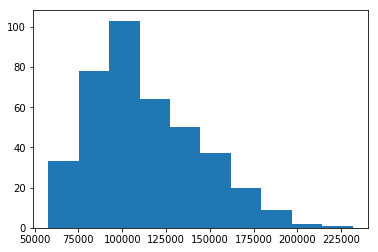

In [48]:
# Display the histogram for salary using matplotlib
plt.hist(df['salary'])

/vol/biomedic2/wbai/usr/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


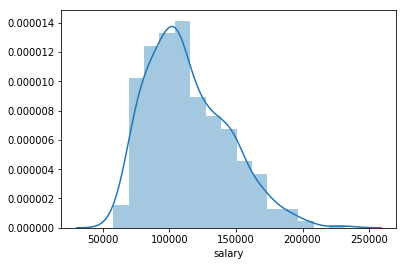

In [49]:
# Display the histogram for salary using seaborn
sns.distplot(df['salary'])

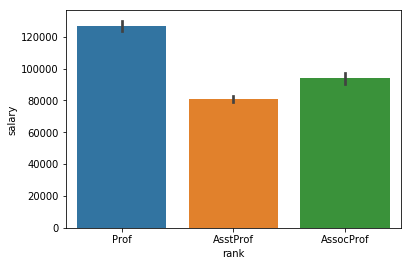

In [60]:
# Bar plot of salary against academic ranks using seaborn
sns.barplot(x='rank', y='salary', data=df)

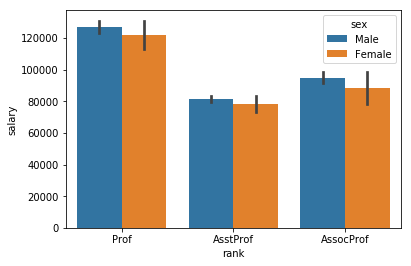

In [59]:
# Bar plot os salary against academic ranks, using different hues for males and females
sns.barplot(x='rank', y='salary', hue='sex', data=df)

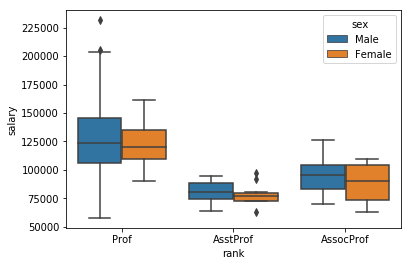

In [62]:
# Box plot os salary against academic ranks, using different hues for males and females
sns.boxplot(x='rank', y='salary', hue='sex', data=df)

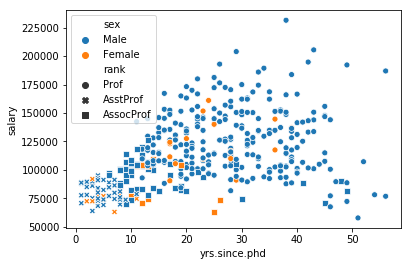

In [57]:
# Scatter plot of salary against yrs.since.phd, colouring by sex and styling by rank
sns.scatterplot(x='yrs.since.phd', y='salary', hue='sex', style='rank', data=df)

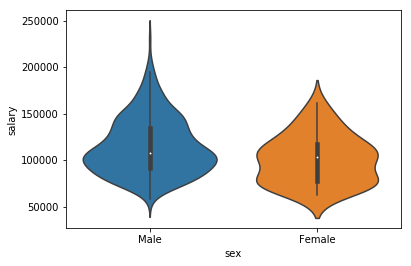

In [56]:
# Violin plot of salary against sex
sns.violinplot(x='sex', y='salary', data=df)

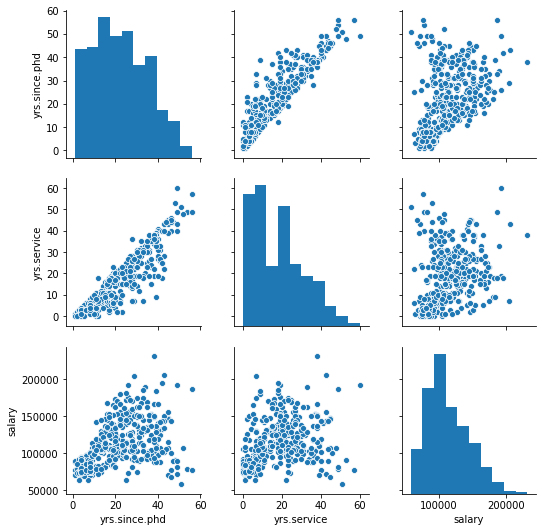

In [68]:
# Pair plot to show joint relationships and histograms
sns.pairplot(df)

## Q1.6 Student T-test

In [70]:
# Perform t-test between female salaries and male salaries
df_f = df[df['sex'] == 'Female']['salary']
df_m = df[df['sex'] == 'Male']['salary']
stats.ttest_ind(df_f, df_m)   

Ttest_indResult(statistic=-2.781674064262432, pvalue=0.005667106519338681)

## Q1.7 A larger and more complex dataset

This is the Kaggle San Francisco city employee salary dataset.

https://www.kaggle.com/kaggle/sf-salaries

In [71]:
# Load the dataset
df = pd.read_csv('Salaries_SF.csv')

/vol/biomedic2/wbai/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
# Display the shape of the data
df.shape

(148654, 13)

In [73]:
# Display the first 10 rows of the data
df.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.7,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [74]:
# Display the statistics of the TotalPayBenefits for FIREFIGHTER
df2 = df[df['JobTitle'] == 'FIREFIGHTER']
df2['TotalPayBenefits'].describe()

count       794.000000
mean     139292.045945
std       35809.783882
min           5.800000
25%      125244.487500
50%      140494.175000
75%      160592.367500
max      250317.930000
Name: TotalPayBenefits, dtype: float64

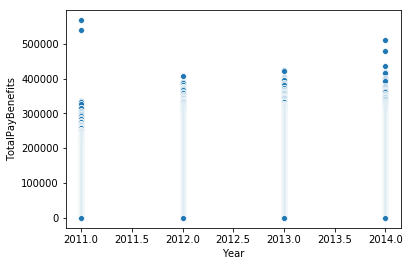

In [76]:
# Scatter plot of TotalPayBenefits against Year
sns.scatterplot(x='Year', y='TotalPayBenefits', data=df)

In [77]:
# Scatter plot of TotalPayBenefits against OtherPay, only for subjects with positive OtherPay and with provided data
df2 = df[df['OtherPay'] > 0]
sns.scatterplot(x='OtherPay', y='TotalPayBenefits', data=df2)

TypeError: '>' not supported between instances of 'str' and 'int'

In [84]:
[x.dtype==np.number for x in df['OtherPay']]

AttributeError: 'float' object has no attribute 'dtype'

In [83]:
df.select_dtypes(include='number')

,Id,TotalPay,TotalPayBenefits,Year,Notes
0,1,567595.43,567595.43,2011,NaN
1,2,538909.28,538909.28,2011,NaN
2,3,335279.91,335279.91,2011,NaN
3,4,332343.61,332343.61,2011,NaN
4,5,326373.19,326373.19,2011,NaN
5,6,316285.74,316285.74,2011,NaN
6,7,315981.05,315981.05,2011,NaN
7,8,307899.46,307899.46,2011,NaN
8,9,303427.55,303427.55,2011,NaN
9,10,302377.73,302377.73,2011,NaN
